In [1]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [2]:
%cd /content/drive/My\ Drive/Colab\ Notebooks/data 
# change directory
%pwd  # Ben neredeyim komutu
!ls    # İçerisinde ne var 

/content/drive/My Drive/Colab Notebooks/data
states_all.csv	StudentsPerformance.csv


In [3]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
import seaborn as sns
import scipy.stats as stats
from scipy.stats.mstats import winsorize
from sqlalchemy import create_engine
import warnings

warnings.filterwarnings('ignore')
sns.set(style="whitegrid")
baslik_font = {'family': 'arial', 'color': 'darkred','weight': 'bold','size': 13 }
eksen_font  = {'family': 'arial', 'color': 'darkblue','weight': 'bold','size': 10 }

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [4]:
data = pd.read_csv("StudentsPerformance.csv", index_col=0)
data.head()

,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
gender,,,,,,,
female,group B,bachelor's degree,standard,none,72,72,74
female,group C,some college,standard,completed,69,90,88
female,group B,master's degree,standard,none,90,95,93
male,group A,associate's degree,free/reduced,none,47,57,44
male,group C,some college,standard,none,76,78,75


(array([  2.,   6.,  14.,  55., 126., 161., 223., 225., 120.,  68.]),
 array([ 10.,  19.,  28.,  37.,  46.,  55.,  64.,  73.,  82.,  91., 100.]),
 <a list of 10 Patch objects>)

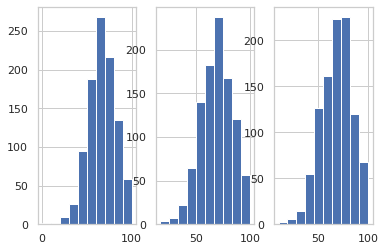

In [5]:
plt.subplot(1, 3, 1)
plt.hist(data['math score'])
plt.subplot(1, 3, 2)
plt.hist(data['reading score'])
plt.subplot(1, 3, 3)
plt.hist(data['writing score'])

In [12]:
from scipy.stats import normaltest # fill list e benzer bir şekilde tek tek teste sokabilirsin log'a gerek yok 
scorelarList=['math score','reading score','writing score']
norm_stats = normaltest(data['math score'])
norm_stats[0]
norm_stats[1]

0.00045080293869937836

In [17]:
for i in range(3):
  norm_stats = normaltest(data[scorelarList[i]])
  print(norm_stats[0])
  print(norm_stats[1])

15.408960513931822
0.00045080293869937836
11.11741279628622
0.003853758403576582
13.606450837263859
0.0011101885439899974


In [21]:
data['Ortalama Score']=(data['math score'] + data['reading score'] + data['writing score'])/3
data.head()

,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,Ortalama Score
gender,,,,,,,,
female,group B,bachelor's degree,standard,none,72,72,74,72.666667
female,group C,some college,standard,completed,69,90,88,82.333333
female,group B,master's degree,standard,none,90,95,93,92.666667
male,group A,associate's degree,free/reduced,none,47,57,44,49.333333
male,group C,some college,standard,none,76,78,75,76.333333


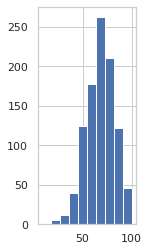

In [24]:
plt.subplot(1, 3, 1)
plt.hist(data['Ortalama Score'])
plt.show()

In [41]:
norm_stats = normaltest(data['Ortalama Score'])
norm_stats[0]
norm_stats[1]

0.0005037851534494478

In [33]:
from sklearn.preprocessing import normalize # Normalleştirmeyi kütüphaneden çekip uygulama
data['Normal Ortalama Score'] = normalize(np.array(data['Ortalama Score']).reshape(1,-1)).reshape(-1,1)
data.head()

,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,Ortalama Score,Normal Ortalama Score
gender,,,,,,,,,
female,group B,bachelor's degree,standard,none,72,72,74,72.666667,0.033182
female,group C,some college,standard,completed,69,90,88,82.333333,0.037596
female,group B,master's degree,standard,none,90,95,93,92.666667,0.042314
male,group A,associate's degree,free/reduced,none,47,57,44,49.333333,0.022527
male,group C,some college,standard,none,76,78,75,76.333333,0.034856


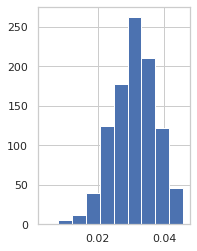

In [39]:
plt.subplot(1, 2, 1)
plt.hist(data['Normal Ortalama Score'])
plt.show()

In [40]:
norm_stats = normaltest(data['Normal Ortalama Score'])
norm_stats[0]
norm_stats[1]

0.0005037851534493705

findfont: Font family ['arial'] not found. Falling back to DejaVu Sans.


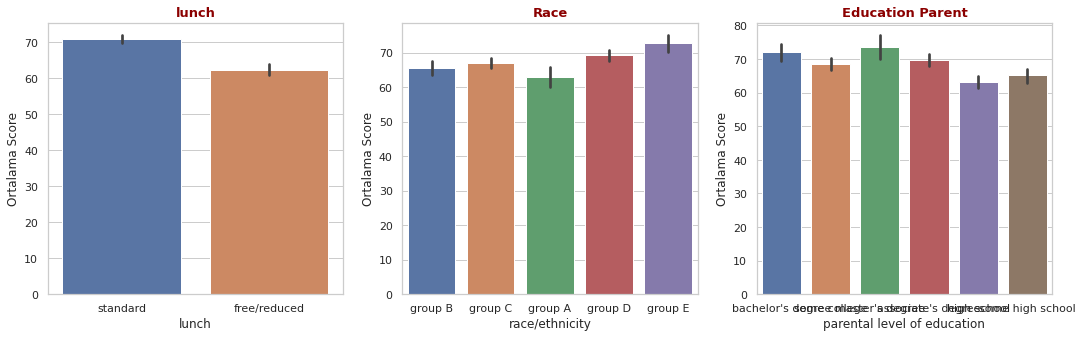

In [45]:
baslik_font = {'family': 'arial', 'color': 'darkred','weight': 'bold','size': 13 } # Burda da görsellik yakalamaya çalıştım ama correlasyon yapabilirmiydim emin değilim ?
eksen_font  = {'family': 'arial', 'color': 'darkblue','weight': 'bold','size': 10 }

plt.figure(figsize=(18,5))

plt.subplot(1,3,1)
sns.barplot(data['lunch'], data["Ortalama Score"])
plt.title("lunch", fontdict = baslik_font)

plt.subplot(1,3,2)
sns.barplot(data['race/ethnicity'], data["Ortalama Score"])
plt.title("Race", fontdict = baslik_font)

plt.subplot(1,3,3)

sns.barplot(data['parental level of education'], data["Ortalama Score"])
plt.title("Education Parent", fontdict = baslik_font)


plt.show()

findfont: Font family ['arial'] not found. Falling back to DejaVu Sans.


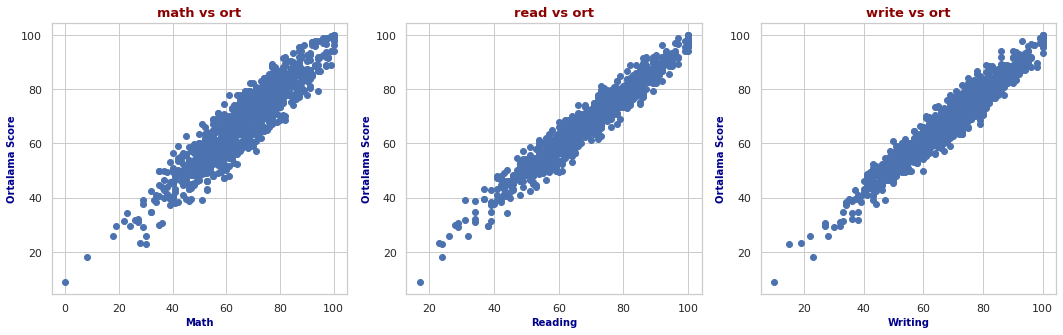

In [46]:
plt.figure(figsize=(18,5))
baslik_font = {'family': 'arial', 'color': 'darkred','weight': 'bold','size': 13 }
eksen_font  = {'family': 'arial', 'color': 'darkblue','weight': 'bold','size': 10 }

plt.subplot(1,3,1)
plt.scatter(data['math score'], data["Ortalama Score"])
plt.title("math vs ort", fontdict=baslik_font)
plt.xlabel('Math', fontdict=eksen_font )
plt.ylabel('Ortalama Score', fontdict=eksen_font )


plt.subplot(1,3,2)
plt.scatter(data['reading score'], data["Ortalama Score"])
plt.title("read vs ort", fontdict=baslik_font)
plt.xlabel('Reading', fontdict=eksen_font )
plt.ylabel('Ortalama Score', fontdict=eksen_font )

plt.subplot(1,3,3)
plt.scatter(data['writing score'], data["Ortalama Score"])
plt.title("write vs ort", fontdict=baslik_font)
plt.xlabel('Writing', fontdict=eksen_font )
plt.ylabel('Ortalama Score', fontdict=eksen_font )

plt.show()